In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

In [3]:
warnings.filterwarnings('ignore')

- Above warnings function will ignore the warnings.

<h2>Objective of analysis</h2>
- <b>Which variables are significant in predicting the price of a car</b>
- <b>How well those variables describe the price of a car</b>

In [4]:
car=pd.read_csv("C:\\UpGrad\\LinearRegressionAssignment\\CarPrice_Assignment.csv")

In [5]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


- If we see above data we can see that 75% and max have not much difference i,e the difference is consistant so we can easily say that their are no outliers.

In [7]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

- We have 26 columns and 205 rows all the columns have complete data none of them have null value.

- <b>We need to split the car name in order to get company which is said in the question to be considered as the independent variable.</b>

In [8]:
car['company']=car['CarName'].map(lambda x:x.split(' ',1)[0].lower())

In [9]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


- After getting the company name we see inconsistancy in names i,e the names are misspelled.We need to correct that.

In [10]:
np.unique(car['company'])

array(['alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge',
       'honda', 'isuzu', 'jaguar', 'maxda', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porcshce',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'volvo', 'vw'], dtype=object)

In [11]:
car.loc[car['company']=='maxda','company']='mazda'

In [12]:
car.loc[car['company']=='porcshce','company']='porsche'

In [13]:
car.loc[car['company']=='toyouta','company']='toyota'

In [14]:
car.loc[(car['company']=='vokswagen') | (car['company']=='vw'),'company']='volkswagen'

In [15]:
np.unique(car['company'])

array(['alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge',
       'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [16]:
np.unique(car['drivewheel'])

array(['4wd', 'fwd', 'rwd'], dtype=object)

In [17]:
car.drop_duplicates(inplace=True)

- We need to check for duplicates and drop if any exist.

In [18]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 27 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

- We see that their are no duplicates present in the dataset.

<h2>Now the data cleaning is done.Let's start with EDA.</h2>

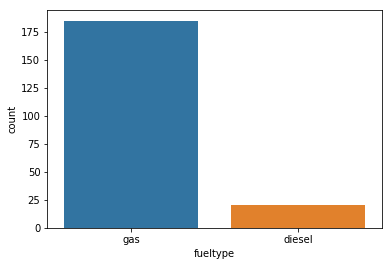

In [19]:
sns.countplot(car['fueltype'])

- We see that maximum number of cars have fueltype as Gas.

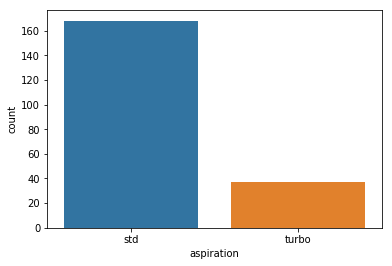

In [20]:
sns.countplot(car['aspiration'])

- We see that maximum number of cars have std aspiration.

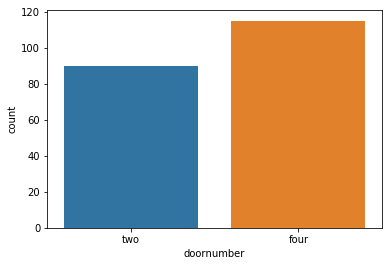

In [21]:
sns.countplot(car['doornumber'])

- We see that maximum number of cars manufactured have 4 doors.

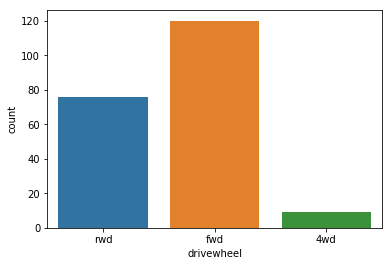

In [22]:
sns.countplot(car['drivewheel'])

- We see that maximum number of cars manufactured have forward drivewheel.

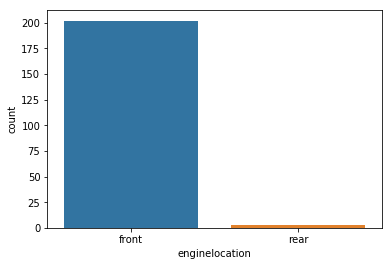

In [23]:
sns.countplot(car['enginelocation'])

- We see that maximum number of cars manufactured have front enginelocation.

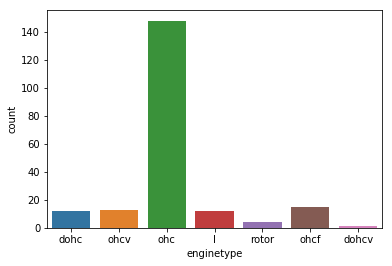

In [24]:
sns.countplot(car['enginetype'])

- We see that maximum number of cars manufactured have ohc as enginetype.

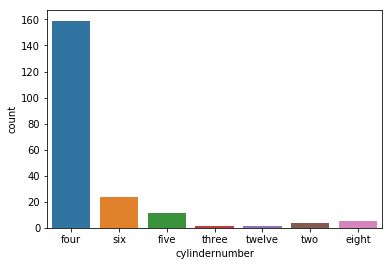

In [25]:
sns.countplot(car['cylindernumber'])

- - We see that maximum number of cars manufactured have 4 cylinders.

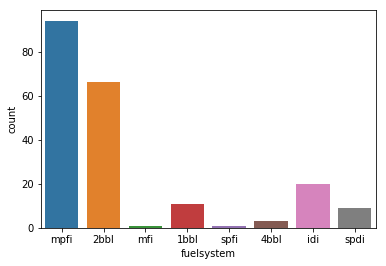

In [26]:
sns.countplot(car['fuelsystem'])

- We see that maximum number of cars manufactured have mpfi fuelsystem.

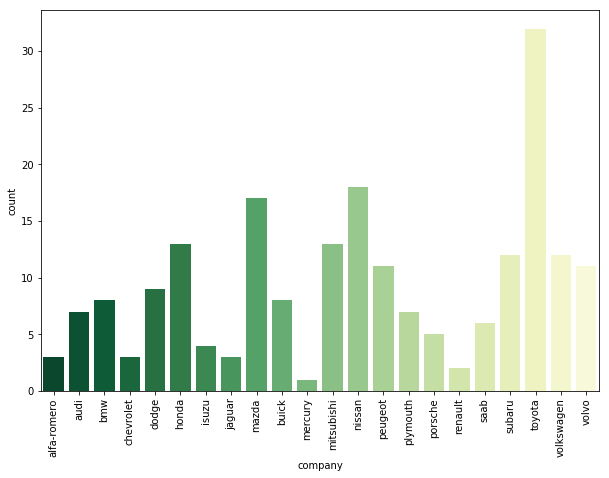

In [27]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot(car['company'],palette='YlGn_r')

- We see that maximum number of cars manufactured by toyota.

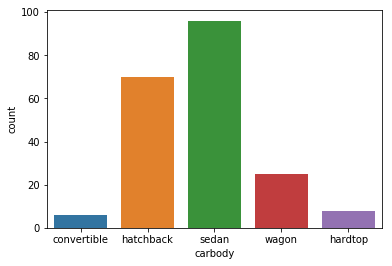

In [28]:
sns.countplot(car['carbody'])

- We see that maximum number of cars manufactured have sedan carbody.

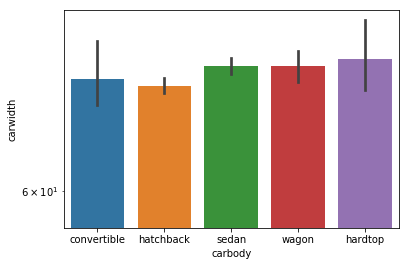

In [29]:
plt.yscale('log')
sns.barplot('carbody','carwidth',data=car)

- Hardtop has got maximum carwidth compared to others.

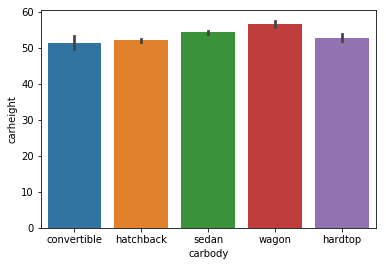

In [30]:
sns.barplot('carbody','carheight',data=car)

- Car widths are closer but wagon got max height compared to others.

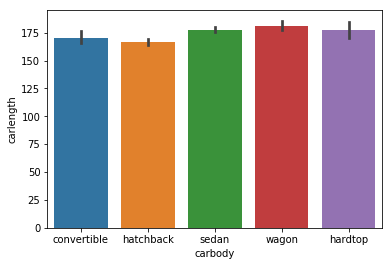

In [31]:
sns.barplot('carbody','carlength',data=car)

- Car lengths are very closer but wagon hot more length comapred to others.

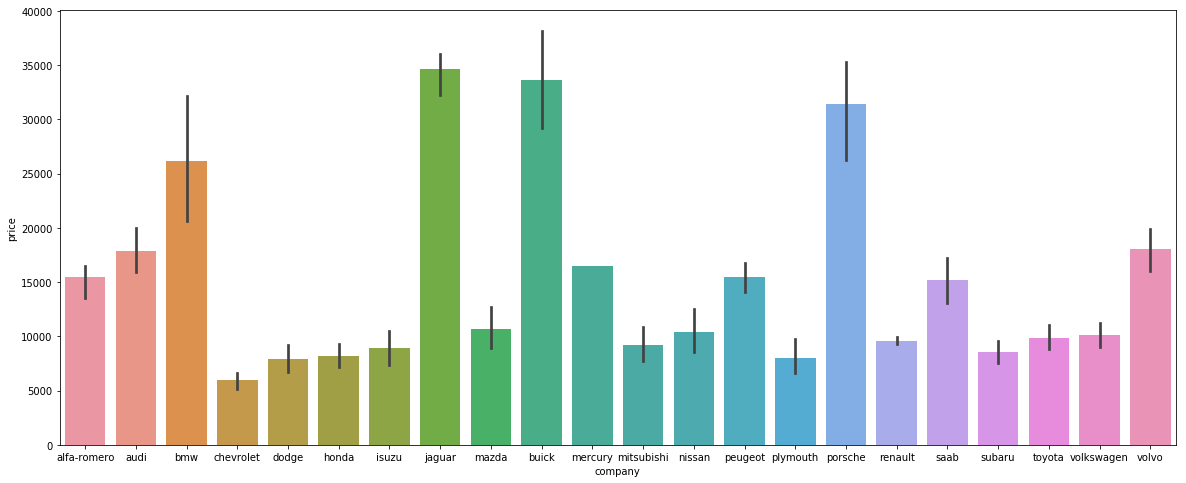

In [32]:
plt.figure(figsize=(20,8))
sns.barplot(car['company'],car['price'])

- Jaguar cars have highest price compared to others.

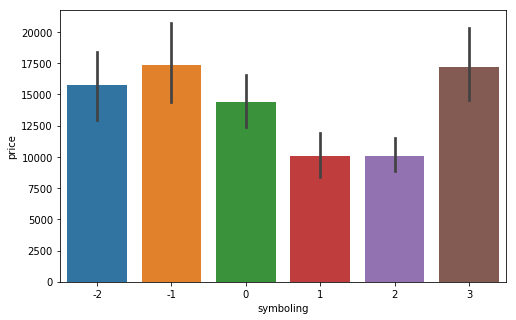

In [33]:
plt.figure(figsize=(8,5))
sns.barplot('symboling','price',data=car)

- We see that cars with symboling -1 and 3 have higher price despite that fact that cars with negative symboling are more safe.

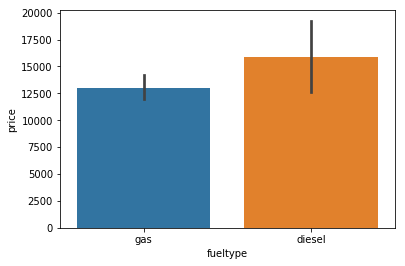

In [34]:
sns.barplot('fueltype','price',data=car)

- Diesel cars are costlier than petrol cars

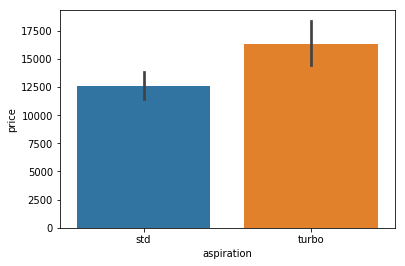

In [35]:
sns.barplot('aspiration','price',data=car)

- Turbo aspiration cars are costilier compared to other type. 

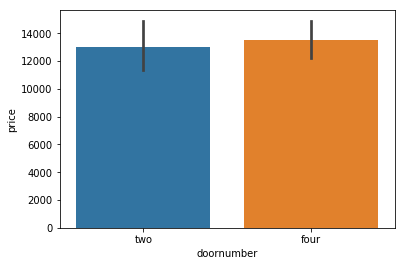

In [36]:
sns.barplot('doornumber','price',data=car)

- Cars with 4 and 2 doors prices are close by but in this dataset cars with 4 door are expensive compared to 2 door.

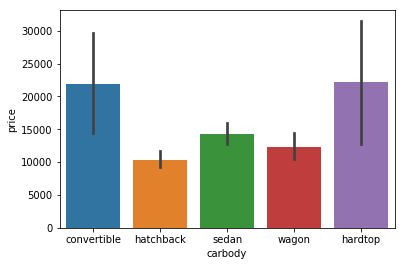

In [37]:
sns.barplot('carbody','price',data=car)

- Hardtop and convertible cars are costilier compared to other.

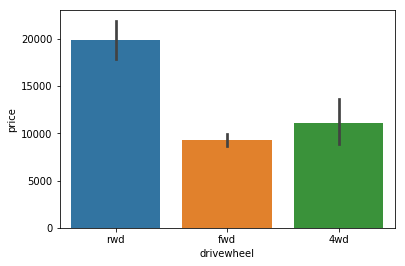

In [38]:
sns.barplot('drivewheel','price',data=car)

- Cars with rwd drivewheel are expensive compared to others.

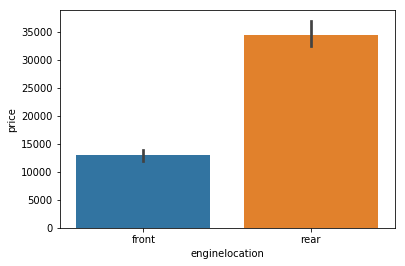

In [39]:
sns.barplot('enginelocation','price',data=car)

- Cars with rear enginelocation are expensive compared to front.

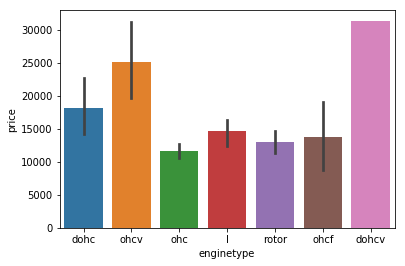

In [40]:
sns.barplot('enginetype','price',data=car)

- - Cars with rwd dohcv enginetype are expensive compared to others.

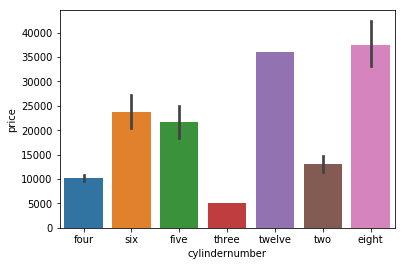

In [41]:
sns.barplot('cylindernumber','price',data=car)

- Cars with eight cylindernumber are expensive compared to others.

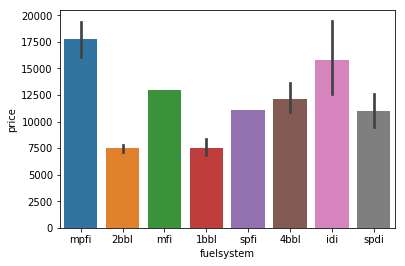

In [42]:
sns.barplot('fuelsystem','price',data=car)

- Cars with mpfi fuelsystem are expensive compared to others.

<b>Lets now analyze numerical variable how they can explain price.</b>

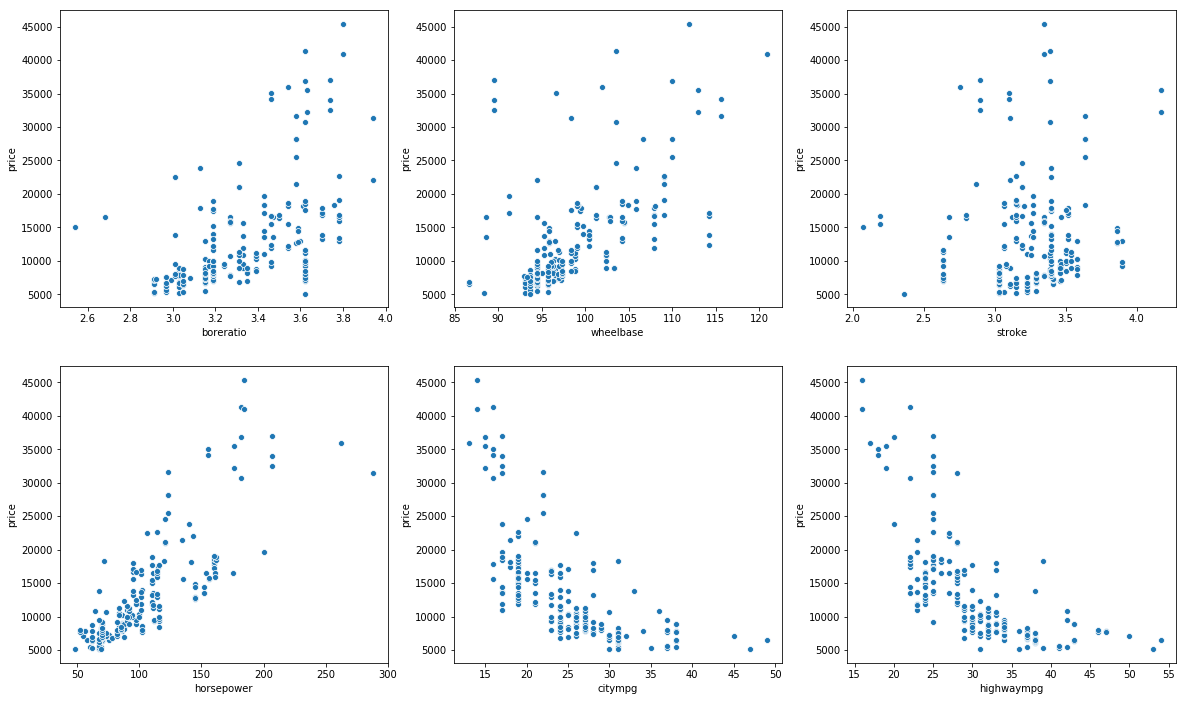

In [43]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.scatterplot('boreratio','price',data=car)
plt.subplot(2,3,2)
sns.scatterplot('wheelbase','price',data=car)
plt.subplot(2,3,3)
sns.scatterplot('stroke','price',data=car)
plt.subplot(2,3,4)
sns.scatterplot('horsepower','price',data=car)
plt.subplot(2,3,5)
sns.scatterplot('citympg','price',data=car)
plt.subplot(2,3,6)
sns.scatterplot('highwaympg','price',data=car)
plt.show()

- With Horsepower we can fit positive linear line with price.With increase in that price also increases.
- city and highway mpg are high for lower price and wise versa.
- stroke and bore ratio have more scattered data.
- wheel base can explain price upto some extent.

<h2>Bivariate Analysis.</h2>

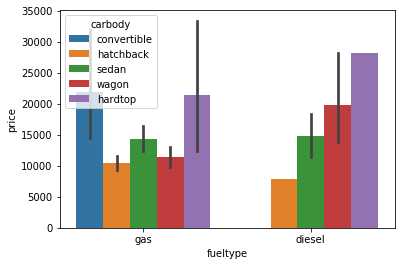

In [44]:
sns.barplot('fueltype','price',hue='carbody',data=car,estimator=np.mean)

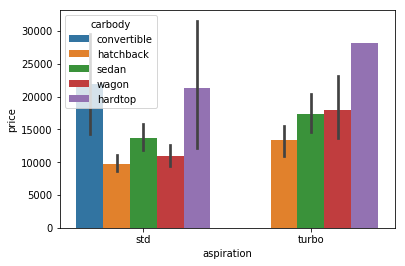

In [45]:
sns.barplot('aspiration','price',hue='carbody',data=car,estimator=np.mean)

- We see that hardotp tops the price for diesel variant with turbo aspiration.

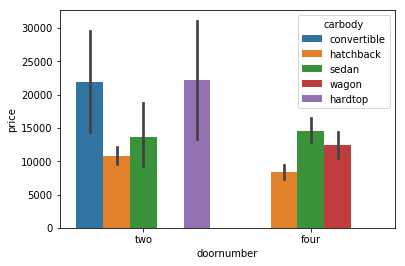

In [46]:
sns.barplot('doornumber','price',hue='carbody',data=car,estimator=np.mean)

- Within the four door cars sedan tops the price chart.

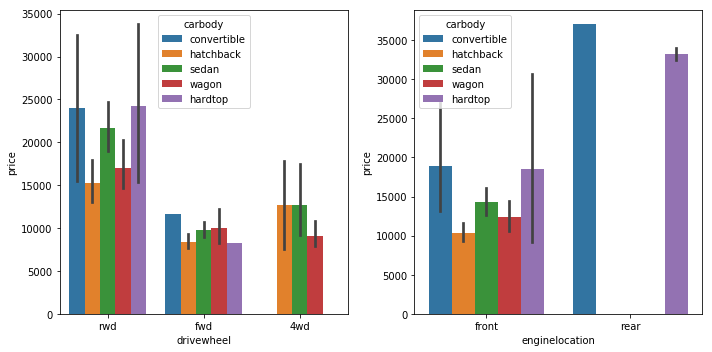

In [47]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot('drivewheel','price',hue='carbody',data=car,estimator=np.mean)
plt.subplot(1,2,2)
sns.barplot('enginelocation','price',hue='carbody',data=car,estimator=np.mean)
plt.tight_layout()
plt.show()

- Convertable having rwd drivewheel and front engine location has high price than others in the same category.

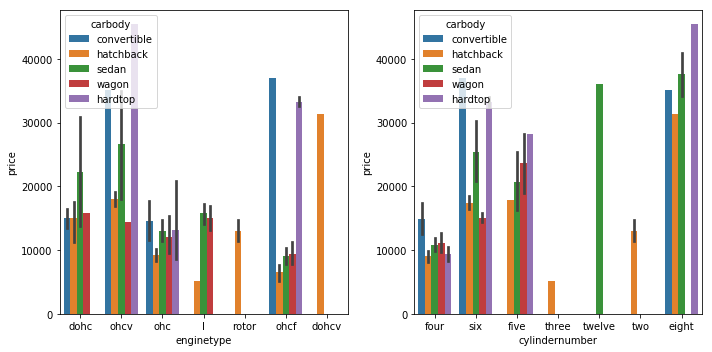

In [48]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot('enginetype','price',hue='carbody',data=car,estimator=np.mean)
plt.subplot(1,2,2)
sns.barplot('cylindernumber','price',hue='carbody',data=car,estimator=np.mean)
plt.tight_layout()
plt.show()

In [49]:
car.drop(['car_ID'],axis=1,inplace=True)

In [50]:
car.drop(['CarName'],axis=1,inplace=True)

- We drop Carname and CarId as they are of no use for further analysis.

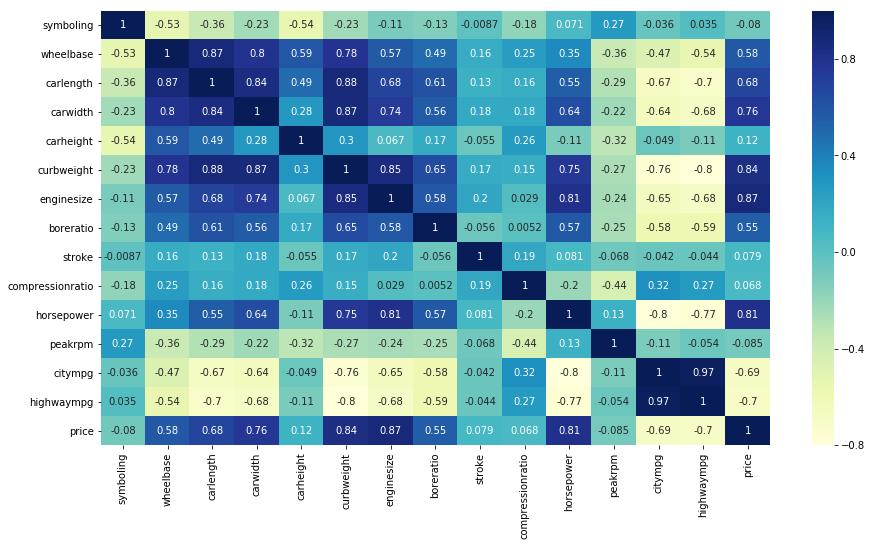

In [51]:
plt.figure(figsize=(15,8))
sns.heatmap(car.corr(),annot=True,cmap="YlGnBu")

- <b>We have drawn heat map of dataset and we are mainely focused on price variable as that is the dependent variable and we can see which all the variables are highly correlated to it.This will help us to build the modal and which variable to consider at the beginning to create modal</b>

In [52]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg    

- <b>For ease of building the modal lets convert cylinder number from categorical to numerical as they are in numerical fashion written in words</b>

In [53]:
def tonums(data):
    if data.lower()=='one':
        return 1
    elif data.lower()=='two':
        return 2
    elif data.lower()=='three':
        return 3
    elif data.lower()=='four':
        return 4
    elif data.lower()=='five':
        return 5
    elif data.lower()=='eight':
        return 8
    elif data.lower()=='six':
        return 6
    elif data.lower()=='twelve':
        return 12

- Above function converts categorical cylinders to numerical ones.

In [54]:
np.unique(car['cylindernumber'])

array(['eight', 'five', 'four', 'six', 'three', 'twelve', 'two'],
      dtype=object)

In [55]:
car['cylindernumber']=car['cylindernumber'].map(tonums)

In [56]:
car.loc[car['cylindernumber'].isnull(),'cylindernumber']

Series([], Name: cylindernumber, dtype: int64)

- <b>We need to do dummy encoding before building modal as it only accepts numerical values</b>

In [57]:
car_dummies=pd.get_dummies(car,drop_first=True)

In [58]:
car_dummies.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0


- After dummy encoding we get 60 columns.We are dropping first which means if we have <code>n</code> categorical vars than the dummy function will return <code>n-1</code> columns.

In [59]:
from sklearn.model_selection import train_test_split

- We need to divide the data into train and test.We have reserved 70% of data for train and 30% for testing.

In [60]:
df_train,df_test=train_test_split(car_dummies,test_size=0.3,train_size=0.7,random_state=100)

In [61]:
from sklearn.preprocessing import MinMaxScaler

- We need to bring all numerical variable in same scale before modal building this is done by using MinMax scaler.

In [62]:
scaler=MinMaxScaler()

In [63]:
car.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'company'],
      dtype='object')

In [64]:
vars=['symboling','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber','enginesize','boreratio','stroke','compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price']
df_train[vars]=scaler.fit_transform(df_train[vars])

In [65]:
df_train.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.411141,0.525476,0.461655,0.509004,0.407878,0.240559,0.241351,0.497946,0.535389,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,0.239200,0.205581,0.204848,0.184517,0.215378,0.211269,0.115818,0.154619,0.207140,0.157843,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.272414,0.399187,0.304167,0.353982,0.245539,0.200000,0.135849,0.305556,0.464646,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.341379,0.502439,0.425000,0.522124,0.355702,0.200000,0.184906,0.500000,0.545455,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,0.503448,0.669919,0.550000,0.668142,0.559542,0.200000,0.301887,0.682540,0.611111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- After fitTransform we can see that all numerical values are in scale of 0 and 1.

In [66]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 60 columns):
symboling              143 non-null float64
wheelbase              143 non-null float64
carlength              143 non-null float64
carwidth               143 non-null float64
carheight              143 non-null float64
curbweight             143 non-null float64
cylindernumber         143 non-null float64
enginesize             143 non-null float64
boreratio              143 non-null float64
stroke                 143 non-null float64
compressionratio       143 non-null float64
horsepower             143 non-null float64
peakrpm                143 non-null float64
citympg                143 non-null float64
highwaympg             143 non-null float64
price                  143 non-null float64
fueltype_gas           143 non-null uint8
aspiration_turbo       143 non-null uint8
doornumber_two         143 non-null uint8
carbody_hardtop        143 non-null uint8
carbody_hatchback      

In [67]:
y_train=df_train.pop('price')
X_train=df_train

- We need to seperate dependent and indepenedent variables which is done above.

In [68]:
X_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo
122,0.6,0.244828,0.426016,0.291667,0.265487,0.272692,0.2,0.139623,0.230159,0.525253,...,0,0,1,0,0,0,0,0,0,0
125,1.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.2,0.339623,1.000000,0.464646,...,0,0,0,1,0,0,0,0,0,0
166,0.6,0.272414,0.448780,0.308333,0.424779,0.314973,0.2,0.139623,0.444444,0.449495,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.2,0.260377,0.626984,0.247475,...,0,0,0,0,0,0,0,0,0,0
199,0.2,0.610345,0.775610,0.575000,0.858407,0.647401,0.2,0.260377,0.746032,0.484848,...,0,0,0,0,0,0,0,0,0,1


- <b>Let's start building modal.First we use forward variable selection and then we can apply RFE to eliminate remaining features.</b>

In [69]:
import statsmodels.api as sm

In [70]:
X_train_con1=sm.add_constant(X_train[['enginesize']])

- From the heat map which we plotted previously we know that enginesize is highly correlated to price.So first we choose that and continue the selection.

In [71]:
lr1=sm.OLS(y_train,X_train_con1).fit()

In [72]:
lr1.params

const        -0.072888
enginesize    1.210676
dtype: float64

In [73]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           1.09e-44
Time:                        21:34:11   Log-Likelihood:                 117.01
No. Observations:                 143   AIC:                            -230.0
Df Residuals:                     141   BIC:                            -224.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0729      0.017     -4.362      0.0

- We can observe the adj R squared to know how much variance it can explain and p value to take decide the significance.

- This forward selection we continue till all the numerical variables are exhausted and than we perform RFE on selected numerical variables and dummy coded categorical variables.

In [74]:
X_train_con2=sm.add_constant(X_train[['enginesize','curbweight']])
lr2=sm.OLS(y_train,X_train_con2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     284.0
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           5.31e-50
Time:                        21:34:11   Log-Likelihood:                 132.84
No. Observations:                 143   AIC:                            -259.7
Df Residuals:                     140   BIC:                            -250.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1281      0.018     -7.239      0.0

In [75]:
X_train_con3=sm.add_constant(X_train[['enginesize','curbweight','horsepower']])
lr3=sm.OLS(y_train,X_train_con3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           2.16e-51
Time:                        21:34:11   Log-Likelihood:                 139.18
No. Observations:                 143   AIC:                            -270.4
Df Residuals:                     139   BIC:                            -258.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1269      0.017     -7.469      0.0

In [76]:
X_train_con4=sm.add_constant(X_train[['enginesize','curbweight','horsepower','carwidth']])
lr4=sm.OLS(y_train,X_train_con4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     164.3
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           1.91e-51
Time:                        21:34:11   Log-Likelihood:                 142.17
No. Observations:                 143   AIC:                            -274.3
Df Residuals:                     138   BIC:                            -259.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1582      0.021     -7.502      0.0

In [77]:
X_train_con4=sm.add_constant(X_train[['enginesize','curbweight','horsepower','carwidth','carlength']])
lr4=sm.OLS(y_train,X_train_con4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     131.9
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           1.45e-50
Time:                        21:34:11   Log-Likelihood:                 142.79
No. Observations:                 143   AIC:                            -273.6
Df Residuals:                     137   BIC:                            -255.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1469      0.023     -6.258      0.0

- Since car length has p value >0.05 so we'll not consider that for modal building as it is insignifant in the presence of other variables.

In [78]:
X_train_con5=sm.add_constant(X_train[['enginesize','curbweight','horsepower','carwidth','carheight']])
lr5=sm.OLS(y_train,X_train_con5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     130.5
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           2.58e-50
Time:                        21:34:11   Log-Likelihood:                 142.19
No. Observations:                 143   AIC:                            -272.4
Df Residuals:                     137   BIC:                            -254.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1611      0.027     -6.017      0.0

In [79]:
X_train_con6=sm.add_constant(X_train[['enginesize','curbweight','horsepower','carwidth','wheelbase']])
lr6=sm.OLS(y_train,X_train_con6).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     130.5
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           2.59e-50
Time:                        21:34:11   Log-Likelihood:                 142.18
No. Observations:                 143   AIC:                            -272.4
Df Residuals:                     137   BIC:                            -254.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1583      0.021     -7.477      0.0

In [80]:
X_train_con7=sm.add_constant(X_train[['enginesize','curbweight','horsepower','carwidth','boreratio']])
lr7=sm.OLS(y_train,X_train_con7).fit()
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     131.3
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           1.88e-50
Time:                        21:34:11   Log-Likelihood:                 142.52
No. Observations:                 143   AIC:                            -273.0
Df Residuals:                     137   BIC:                            -255.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1494      0.024     -6.300      0.0

In [81]:
X_train_con8=sm.add_constant(X_train[['enginesize','curbweight','horsepower','carwidth','symboling']])
lr8=sm.OLS(y_train,X_train_con8).fit()
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     132.1
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           1.31e-50
Time:                        21:34:11   Log-Likelihood:                 142.90
No. Observations:                 143   AIC:                            -273.8
Df Residuals:                     137   BIC:                            -256.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1896      0.034     -5.603      0.0

In [82]:
X_train_con9=sm.add_constant(X_train[['enginesize','curbweight','horsepower','carwidth','stroke']])
lr9=sm.OLS(y_train,X_train_con9).fit()
print(lr9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     132.3
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           1.23e-50
Time:                        21:34:11   Log-Likelihood:                 142.96
No. Observations:                 143   AIC:                            -273.9
Df Residuals:                     137   BIC:                            -256.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1305      0.031     -4.242      0.0

In [83]:
X_train_con10=sm.add_constant(X_train[['enginesize','curbweight','horsepower','carwidth','compressionratio']])
lr10=sm.OLS(y_train,X_train_con10).fit()
print(lr10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     133.5
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           7.29e-51
Time:                        21:34:11   Log-Likelihood:                 143.51
No. Observations:                 143   AIC:                            -275.0
Df Residuals:                     137   BIC:                            -257.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1594      0.021  

In [84]:
X_train_con11=sm.add_constant(X_train[['enginesize','curbweight','horsepower','carwidth','peakrpm']])
lr11=sm.OLS(y_train,X_train_con11).fit()
print(lr11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     133.3
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           7.85e-51
Time:                        21:34:11   Log-Likelihood:                 143.43
No. Observations:                 143   AIC:                            -274.9
Df Residuals:                     137   BIC:                            -257.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1976      0.033     -6.025      0.0

In [85]:
X_train_con12=sm.add_constant(X_train[['enginesize','curbweight','horsepower','carwidth','citympg']])
lr12=sm.OLS(y_train,X_train_con12).fit()
print(lr12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     130.7
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           2.40e-50
Time:                        21:34:11   Log-Likelihood:                 142.26
No. Observations:                 143   AIC:                            -272.5
Df Residuals:                     137   BIC:                            -254.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1779      0.051     -3.499      0.0

In [86]:
X_train_con13=sm.add_constant(X_train[['enginesize','curbweight','horsepower','carwidth','highwaympg']])
lr13=sm.OLS(y_train,X_train_con13).fit()
print(lr13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     130.7
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           2.40e-50
Time:                        21:34:11   Log-Likelihood:                 142.26
No. Observations:                 143   AIC:                            -272.5
Df Residuals:                     137   BIC:                            -254.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1789      0.053     -3.346      0.0

In [87]:
X_train_con14=sm.add_constant(X_train[['enginesize','curbweight','horsepower','carwidth','cylindernumber']])
lr14=sm.OLS(y_train,X_train_con14).fit()
print(lr14.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     130.6
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           2.46e-50
Time:                        21:34:11   Log-Likelihood:                 142.24
No. Observations:                 143   AIC:                            -272.5
Df Residuals:                     137   BIC:                            -254.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1523      0.027     -5.

- Finally we choose `enginesize`,`curbweight`,`horsepower`,`carwidth` from numerical variables and we add other dummy coded categorical variables to perform RFE.

In [88]:
X=X_train[['enginesize','curbweight','horsepower','carwidth', 'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'company_audi', 'company_bmw',
       'company_buick', 'company_chevrolet', 'company_dodge', 'company_honda',
       'company_isuzu', 'company_jaguar', 'company_mazda', 'company_mercury',
       'company_mitsubishi', 'company_nissan', 'company_peugeot',
       'company_plymouth', 'company_porsche', 'company_renault',
       'company_saab', 'company_subaru', 'company_toyota',
       'company_volkswagen', 'company_volvo']]

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [90]:
def knowvif(X_train_new):
    Vif=pd.DataFrame()
    Vif['factors']=X_train_new.columns
    Vif['vif']=[variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
    Vif['vif']=round(Vif['vif'],2)
    return Vif.sort_values(by='vif',ascending=False)

- The above function return VIF for the dataset we send.VIF helps to determine the influence of that variable if VIF >10 we definately remove that variable if VIF>5 and VIF<10 than it is worth inspecting else we can accept the variable for modal prediction.

- <b>The process of VIF and p value checking will continue untill all the variables are in acceptable region.</b>

In [91]:
lm=LinearRegression()

In [92]:
lm.fit(X,y_train)
rfe=RFE(lm,15)
rfe=rfe.fit(X,y_train)

- We choose top 15 features.

In [93]:
cols=X.columns[rfe.support_]

In [94]:
X=X[cols]

In [95]:
X_train_conrf=sm.add_constant(X)
lr_rf=sm.OLS(y_train,X_train_conrf).fit()
print(lr_rf.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     132.8
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           5.31e-69
Time:                        21:34:13   Log-Likelihood:                 213.02
No. Observations:                 143   AIC:                            -396.0
Df Residuals:                     128   BIC:                            -351.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1233    

In [96]:
X.drop('carbody_hardtop',axis=1,inplace=True)
X_train_conrf=sm.add_constant(X)
lr_rf=sm.OLS(y_train,X_train_conrf).fit()
print(lr_rf.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     143.9
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           4.74e-70
Time:                        21:34:13   Log-Likelihood:                 212.92
No. Observations:                 143   AIC:                            -397.8
Df Residuals:                     129   BIC:                            -356.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1245    

In [97]:
X.drop('carbody_hatchback',axis=1,inplace=True)
X_train_conrf=sm.add_constant(X)
lr_rf=sm.OLS(y_train,X_train_conrf).fit()
print(lr_rf.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     152.8
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           1.94e-70
Time:                        21:34:13   Log-Likelihood:                 211.09
No. Observations:                 143   AIC:                            -396.2
Df Residuals:                     130   BIC:                            -357.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1397    

In [98]:
X.drop('carbody_wagon',axis=1,inplace=True)
X_train_conrf=sm.add_constant(X)
lr_rf=sm.OLS(y_train,X_train_conrf).fit()
print(lr_rf.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     163.3
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           8.32e-71
Time:                        21:34:13   Log-Likelihood:                 209.18
No. Observations:                 143   AIC:                            -394.4
Df Residuals:                     131   BIC:                            -358.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1421    

- Since all the variables in the above modal have p value in acceptance region,now we check for VIF to evaluate variables.

In [99]:
knowvif(X_train_conrf.drop('const',axis=1))

,factors,vif
3,enginelocation_rear,inf
5,enginetype_ohcf,inf
11,company_subaru,inf
0,curbweight,40.000000
2,carwidth,24.500000
1,horsepower,12.140000
9,company_peugeot,9.530000
4,enginetype_l,9.000000
10,company_porsche,1.990000
8,company_jaguar,1.370000


In [100]:
X.drop('enginelocation_rear',axis=1,inplace=True)
X_train_conrf=sm.add_constant(X)
lr_rf=sm.OLS(y_train,X_train_conrf).fit()
print(lr_rf.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     163.3
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           8.32e-71
Time:                        21:34:13   Log-Likelihood:                 209.18
No. Observations:                 143   AIC:                            -394.4
Df Residuals:                     131   BIC:                            -358.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1421      0.017     

In [101]:
knowvif(X_train_conrf.drop('const',axis=1))

,factors,vif
0,curbweight,40.00
2,carwidth,24.50
4,enginetype_ohcf,18.80
10,company_subaru,18.57
1,horsepower,12.14
8,company_peugeot,9.53
3,enginetype_l,9.00
9,company_porsche,1.99
7,company_jaguar,1.37
6,company_buick,1.35


In [102]:
X.drop('curbweight',axis=1,inplace=True)
X_train_conrf=sm.add_constant(X)
lr_rf=sm.OLS(y_train,X_train_conrf).fit()
print(lr_rf.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     150.4
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           4.69e-67
Time:                        21:34:13   Log-Likelihood:                 196.92
No. Observations:                 143   AIC:                            -371.8
Df Residuals:                     132   BIC:                            -339.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1325      0.018     

In [103]:
knowvif(X_train_conrf.drop('const',axis=1))

,factors,vif
3,enginetype_ohcf,18.41
9,company_subaru,18.24
7,company_peugeot,9.24
2,enginetype_l,9.00
0,horsepower,8.39
1,carwidth,8.03
8,company_porsche,1.79
6,company_jaguar,1.24
5,company_buick,1.20
4,company_bmw,1.14


In [104]:
X.drop('company_porsche',axis=1,inplace=True)
X_train_conrf=sm.add_constant(X)
lr_rf=sm.OLS(y_train,X_train_conrf).fit()
print(lr_rf.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     167.7
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           4.44e-68
Time:                        21:34:13   Log-Likelihood:                 196.66
No. Observations:                 143   AIC:                            -373.3
Df Residuals:                     133   BIC:                            -343.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1352      0.018     

In [105]:
knowvif(X_train_conrf.drop('const',axis=1))

,factors,vif
8,company_subaru,13.84
3,enginetype_ohcf,13.79
7,company_peugeot,9.24
2,enginetype_l,9.00
1,carwidth,7.77
0,horsepower,7.51
5,company_buick,1.20
6,company_jaguar,1.20
4,company_bmw,1.12


In [106]:
X.drop('company_subaru',axis=1,inplace=True)
X_train_conrf=sm.add_constant(X)
lr_rf=sm.OLS(y_train,X_train_conrf).fit()
print(lr_rf.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     134.2
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           4.12e-60
Time:                        21:34:13   Log-Likelihood:                 174.14
No. Observations:                 143   AIC:                            -330.3
Df Residuals:                     134   BIC:                            -303.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1212      0.021     

In [107]:
X.drop('enginetype_ohcf',axis=1,inplace=True)
X_train_conrf=sm.add_constant(X)
lr_rf=sm.OLS(y_train,X_train_conrf).fit()
print(lr_rf.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     154.5
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           3.25e-61
Time:                        21:34:13   Log-Likelihood:                 174.13
No. Observations:                 143   AIC:                            -332.3
Df Residuals:                     135   BIC:                            -308.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1205      0.020     

In [108]:
X.drop('company_peugeot',axis=1,inplace=True)
X_train_conrf=sm.add_constant(X)
lr_rf=sm.OLS(y_train,X_train_conrf).fit()
print(lr_rf.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     179.2
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           5.03e-62
Time:                        21:34:13   Log-Likelihood:                 173.30
No. Observations:                 143   AIC:                            -332.6
Df Residuals:                     136   BIC:                            -311.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1112      0.019     -5.

In [109]:
X.drop('enginetype_l',axis=1,inplace=True)
X_train_conrf=sm.add_constant(X)
lr_rf=sm.OLS(y_train,X_train_conrf).fit()
print(lr_rf.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     214.2
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           6.44e-63
Time:                        21:34:13   Log-Likelihood:                 172.58
No. Observations:                 143   AIC:                            -333.2
Df Residuals:                     137   BIC:                            -315.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1160      0.019     -6.

In [110]:
knowvif(X_train_conrf.drop('const',axis=1))

,factors,vif
0,horsepower,6.14
1,carwidth,5.87
4,company_jaguar,1.18
3,company_buick,1.15
2,company_bmw,1.10


- Now we see that all the variables have p value within 0.05 and VIF are <10 and horsepower and carwidth have VIF slightly above 5 which is still acceptable.

- <b>Above are the variables which are significant in predicting the price of a car.</b>
- <b>This modal has Adj R square as 88.2%</b>

In [111]:
y_train_pred_rf=lr_rf.predict(X_train_conrf)

- Now we check the residuals the mean should be zero and it should be normally disributed.

Text(0.5,0,'Errors')

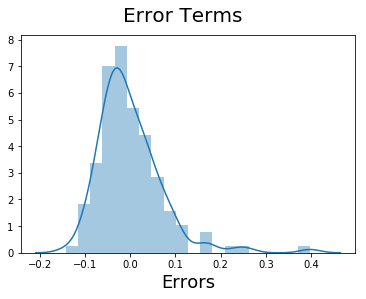

In [112]:
fig = plt.figure()
sns.distplot((y_train-y_train_pred_rf),bins=20)
fig.suptitle('Error Terms', fontsize = 20)       
plt.xlabel('Errors', fontsize = 18) 

- Their is some skiveness to the end which explain it is not able to explain all the prices.

- <b>Now we perform the operation on Test dataset.</b>

In [113]:
X_train_conrf.columns

Index(['const', 'horsepower', 'carwidth', 'company_bmw', 'company_buick',
       'company_jaguar'],
      dtype='object')

In [114]:
X.columns

Index(['horsepower', 'carwidth', 'company_bmw', 'company_buick',
       'company_jaguar'],
      dtype='object')

In [115]:
a=['symboling','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber','enginesize','boreratio','stroke','compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price']

In [116]:
df_test[a]=scaler.transform(df_test[a])

- We use transform because we want to it to take min and max value from train dataset

In [117]:
y_test=df_test.pop('price')
X_test=df_test

In [118]:
X_test_new=sm.add_constant(X_test[X.columns])

In [119]:
y_pred_test=lr_rf.predict(X_test_new)

Text(0,0.5,'y_pred')

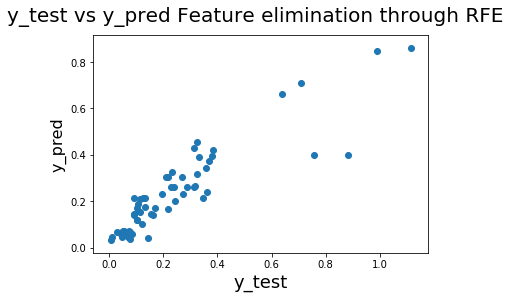

In [120]:
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_pred Feature elimination through RFE', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

- If we see the above graph we can clearly say that it is not able to explain the distribution towards the end.Due to higher variance.

- <b>Below is the modal which is done using manual feature elimination using the same rules for p and VIF instead of going for RFE.</b>

In [121]:
X_train_con15=sm.add_constant(X_train[['enginesize','peakrpm', 'aspiration_turbo',
       'carbody_hatchback',
       'enginetype_rotor',
       'company_bmw',
       'company_buick',
       'company_mitsubishi',
       'company_porsche'
       ]])
lr15=sm.OLS(y_train,X_train_con15).fit()
print(lr15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     145.1
Date:                Sat, 15 Jun 2019   Prob (F-statistic):           2.85e-64
Time:                        21:34:15   Log-Likelihood:                 187.19
No. Observations:                 143   AIC:                            -354.4
Df Residuals:                     133   BIC:                            -324.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1056      0

In [122]:
knowvif(X_train_con15.drop('const',axis=1))

,factors,vif
0,enginesize,3.03
1,peakrpm,3.03
3,carbody_hatchback,1.71
2,aspiration_turbo,1.38
6,company_buick,1.31
4,enginetype_rotor,1.21
7,company_mitsubishi,1.21
5,company_bmw,1.17
8,company_porsche,1.10


- From the above summary we can see that BIC and AIC value are and Adj R square is 90.1% which is better than RFE modal.

In [123]:
y_train_pred=lr15.predict(X_train_con15)

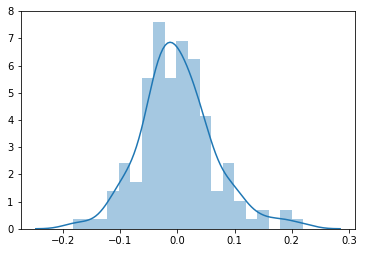

In [124]:
sns.distplot((y_train-y_train_pred),bins=20)

- If we see the above graph even it has skewness but is able to explain most of the data.

In [125]:
X_test_new_15=sm.add_constant(X_test[['enginesize','peakrpm', 'aspiration_turbo',
       'carbody_hatchback',
       'enginetype_rotor',
       'company_bmw',
       'company_buick',
       'company_mitsubishi',
       'company_porsche'
       ]])

In [126]:
y_pred_test_15=lr15.predict(X_test_new_15)

Text(0,0.5,'y_pred')

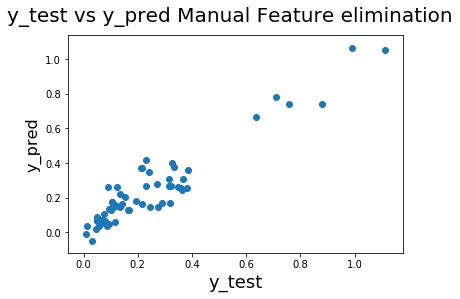

In [127]:
fig = plt.figure()
plt.scatter(y_test,y_pred_test_15)
fig.suptitle('y_test vs y_pred Manual Feature elimination', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [128]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test_15)

0.8913777528792604

In [129]:
r2_score(y_test, y_pred_test)

0.8097860228703553

- <b>R2 score for modal with manual feature elimination has `89.1%` and with RFE R2 score is `80.1%`</b>